In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "D:\Telco-Customer-Churn.csv"  # Change path if needed
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: File not found. Check the file path and try again.")
    exit()

# Display column names to check for mismatches
print("📌 Column Names in Dataset:")
print(df.columns)

# Standardize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Use correct column names
corrected_columns = {
    "tenure": "tenure in months",
    "monthlycharges": "monthly charge",
    "seniorcitizen": "senior citizen"
}

# Check if required columns exist after converting to lowercase
required_columns = [corrected_columns["tenure"], corrected_columns["monthlycharges"], corrected_columns["seniorcitizen"]]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"❌ Error: Missing columns in dataset: {missing_columns}")
    exit()

# Select relevant columns for segmentation
df_segment = df[required_columns].copy()

# Handle missing values
df_segment.dropna(inplace=True)

# Convert categorical columns (Senior Citizen) to numeric (0 and 1)
df_segment["senior citizen"] = df_segment["senior citizen"].astype(int)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df_segment["Cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = df_segment["Cluster"]

# Print cluster sizes
print("\n📊 Customer Segmentation Results:")
print(df["Cluster"].value_counts())

# Visualization of Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_segment, x="tenure in months", y="monthly charge", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Tenure & Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster")
plt.show()

# Bar plot for Senior Citizen Distribution in Clusters
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segment, x="Cluster", hue="senior citizen", palette="coolwarm")
plt.title("Senior Citizen Distribution Across Clusters")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.legend(title="Senior Citizen")
plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vatch\AppData\Local\Temp\ipykernel_14232\2031959444.py:9: SyntaxWarning: invalid escape sequence '\T'
  file_path = "D:\Telco-Customer-Churn.csv"  # Change path if needed


❌ Error: File not found. Check the file path and try again.
📌 Column Names in Dataset:


C:\Users\vatch\AppData\Local\Temp\ipykernel_14232\2031959444.py:9: SyntaxWarning: invalid escape sequence '\T'
  file_path = "D:\Telco-Customer-Churn.csv"  # Change path if needed


NameError: name 'df' is not defined

✅ Dataset loaded successfully!


📊 Customer Segmentation Results:
Cluster
0    1957
2    1572
1     696
Name: count, dtype: int64


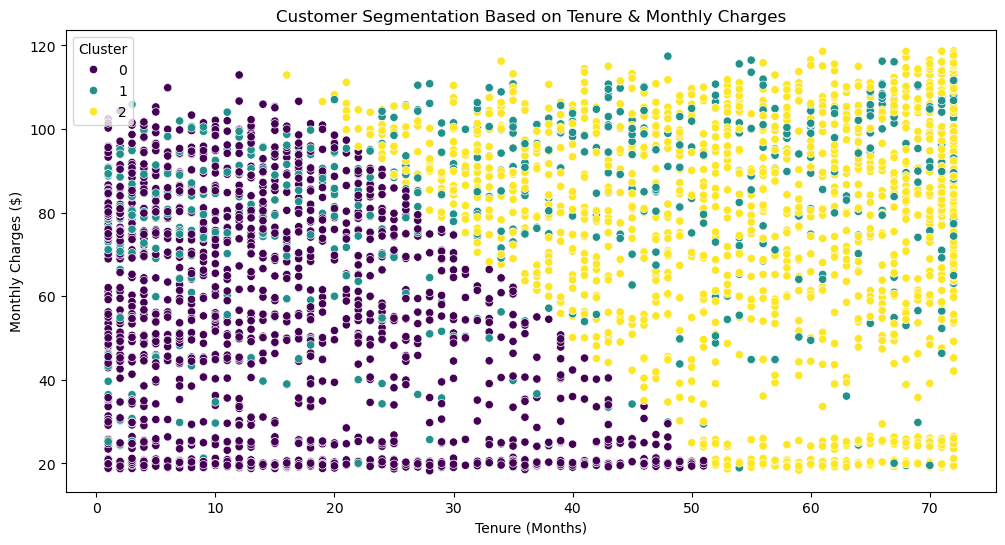

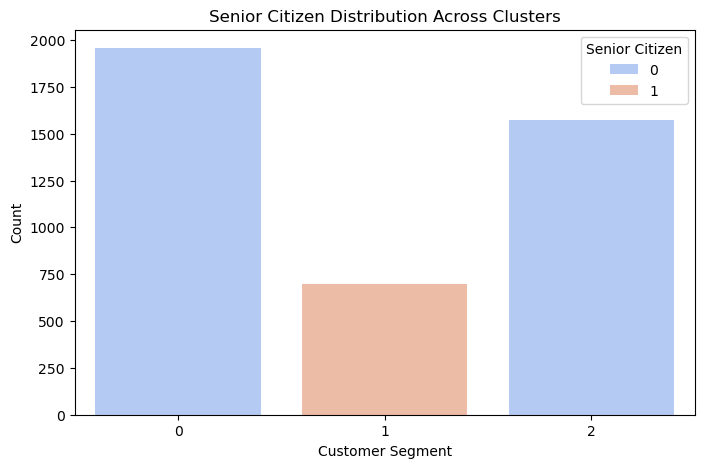

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"D:\atchaya\main.py\Telco-Customer-Churn.csv"  # Update with the correct path

# Check if file exists before reading
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: File not found. Check the file path and try again.")
    exit()

# Standardize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Use correct column names
required_columns = ["tenure in months", "monthly charge", "senior citizen"]

# Check if required columns exist
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"❌ Error: Missing columns in dataset: {missing_columns}")
    exit()

# Select relevant columns for segmentation
df_segment = df[required_columns].copy()

# Handle missing values by filling with median
df_segment.fillna(df_segment.median(), inplace=True)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_segment["Cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = df_segment["Cluster"]

# Print cluster sizes
print("\n📊 Customer Segmentation Results:")
print(df["Cluster"].value_counts())

# Visualization of Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_segment, x="tenure in months", y="monthly charge", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Tenure & Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster")
plt.show()

# Bar plot for Senior Citizen Distribution in Clusters
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segment, x="Cluster", hue="senior citizen", palette="coolwarm")
plt.title("Senior Citizen Distribution Across Clusters")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.legend(title="Senior Citizen")
plt.show()


✅ Dataset loaded successfully!


📊 Customer Segmentation Results:
Cluster
1    3529
0     696
Name: count, dtype: int64


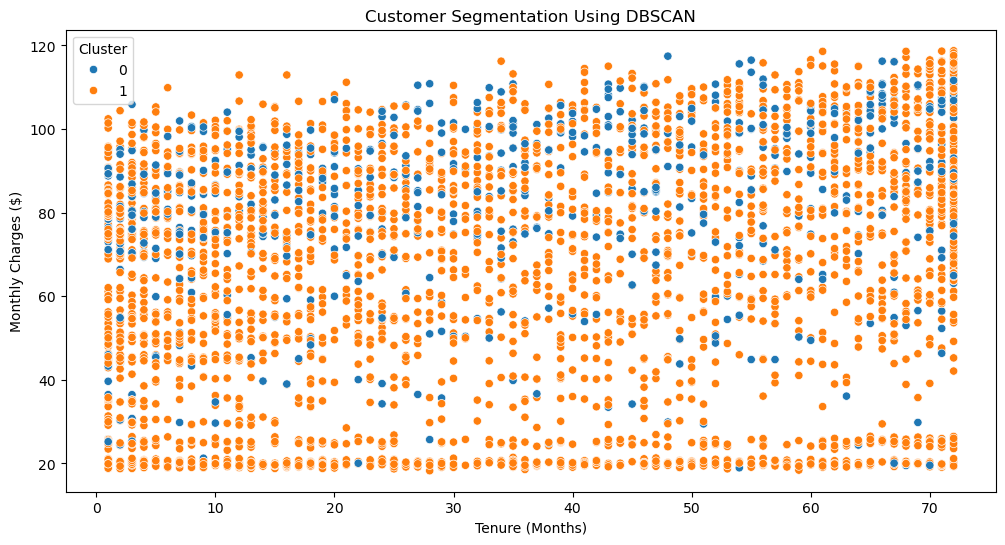

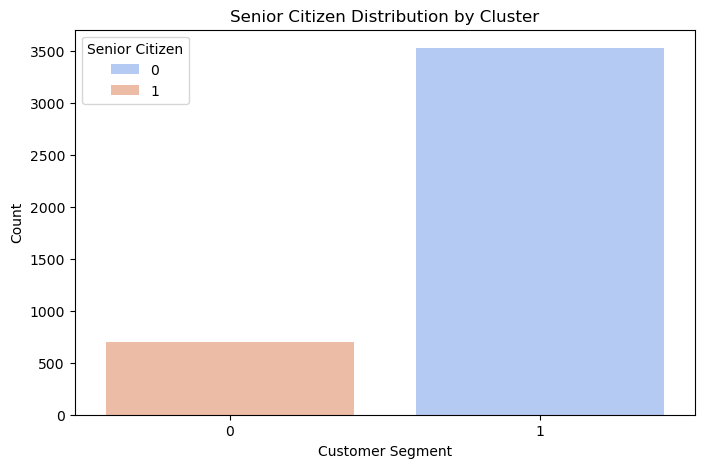

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = r"D:\atchaya\main.py\Telco-Customer-Churn.csv"  # Update the path

# Try to read the file and handle errors
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: File not found. Check the file path and try again.")
    exit()

# Standardize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Define required columns
required_columns = ["tenure in months", "monthly charge", "senior citizen"]

# Check if columns exist
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"❌ Error: Missing columns in dataset: {missing_columns}")
    exit()

# Select relevant columns
df_segment = df[required_columns].copy()

# Handle missing values by filling with the median
df_segment.fillna(df_segment.median(), inplace=True)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust `eps` for better clustering
df_segment["Cluster"] = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = df_segment["Cluster"]

# Print cluster sizes
print("\n📊 Customer Segmentation Results:")
print(df["Cluster"].value_counts())

# Visualization of Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_segment, x="tenure in months", y="monthly charge", hue="Cluster", palette="tab10")
plt.title("Customer Segmentation Using DBSCAN")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster")
plt.show()

# Countplot for Senior Citizen distribution per Cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segment, x="Cluster", hue="senior citizen", palette="coolwarm")
plt.title("Senior Citizen Distribution by Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.legend(title="Senior Citizen")
plt.show()


✅ Dataset loaded successfully!



C:\Users\vatch\AppData\Local\Temp\ipykernel_27924\871811583.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_segment[col].fillna(df_segment[col].median(), inplace=True)
C:\Users\vatch\AppData\Local\Temp\ipykernel_27924\871811583.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 


📊 Customer Segmentation Results:
Cluster
0    1709
2    1659
1     857
Name: count, dtype: int64


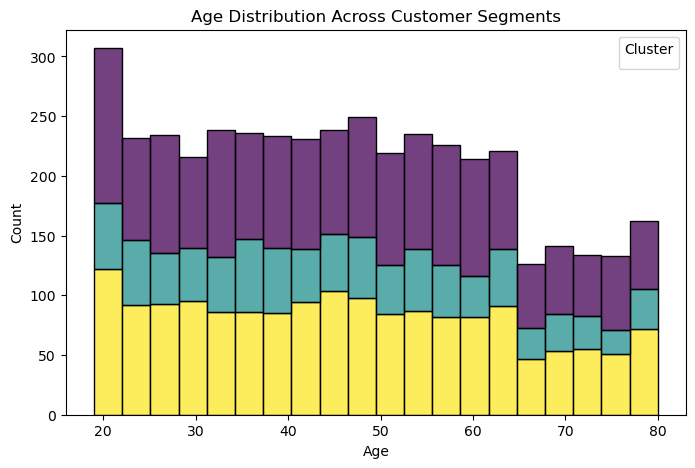

C:\Users\vatch\AppData\Local\Temp\ipykernel_27924\871811583.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Cluster", y="monthly charge", estimator=np.mean, palette="coolwarm")


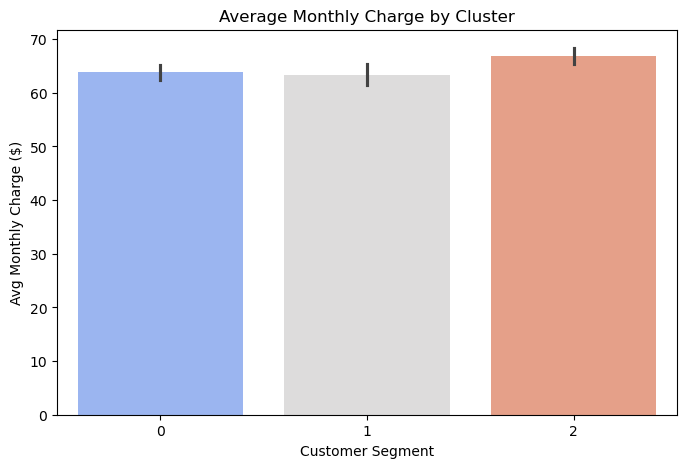

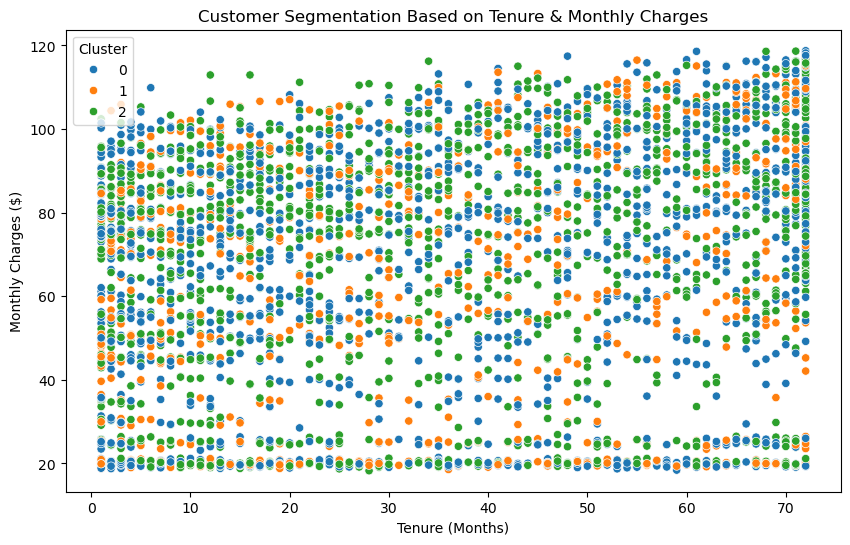

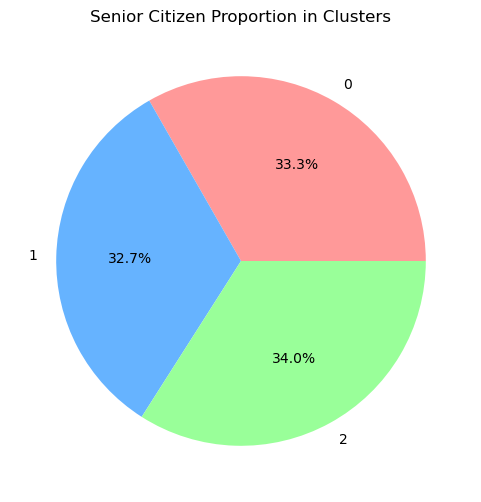

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"D:\atchaya\main.py\Telco-Customer-Churn.csv"  # Update the path

# Try to read the file and handle errors
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: File not found. Check the file path and try again.")
    exit()

# Standardize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Define relevant columns for segmentation
columns_demographics = ["age", "gender", "senior citizen", "married", "dependents"]
columns_geography = ["state", "city", "zip code"]
columns_usage = ["tenure in months", "monthly charge", "total revenue"]

# Check for missing columns
all_columns = columns_demographics + columns_geography + columns_usage
missing_columns = [col for col in all_columns if col not in df.columns]
if missing_columns:
    print(f"❌ Error: Missing columns in dataset: {missing_columns}")
    exit()

# Select relevant columns
df_segment = df[all_columns].copy()

# Handle missing values (fill with median for numeric, mode for categorical)
for col in df_segment.columns:
    if df_segment[col].dtype == 'object':  # Categorical columns
        df_segment[col].fillna(df_segment[col].mode()[0], inplace=True)
    else:  # Numeric columns
        df_segment[col].fillna(df_segment[col].median(), inplace=True)

# Encode categorical variables (one-hot encoding)
df_segment = pd.get_dummies(df_segment, columns=["gender", "married", "state", "city"])

# Normalize numeric features
scaler = StandardScaler()
numeric_cols = ["age", "senior citizen", "dependents", "tenure in months", "monthly charge", "total revenue"]
df_segment[numeric_cols] = scaler.fit_transform(df_segment[numeric_cols])

# Apply KMeans clustering (3 segments)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_segment)

# Print cluster sizes
print("\n📊 Customer Segmentation Results:")
print(df["Cluster"].value_counts())

# ------------------ VISUALIZATIONS ------------------

# 1️⃣ Histogram: Age distribution in Clusters
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="Cluster", multiple="stack", bins=20, palette="viridis")
plt.title("Age Distribution Across Customer Segments")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.show()

# 2️⃣ Bar Chart: Average Monthly Charge per Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Cluster", y="monthly charge", estimator=np.mean, palette="coolwarm")
plt.title("Average Monthly Charge by Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Avg Monthly Charge ($)")
plt.show()

# 3️⃣ Scatter Plot: Tenure vs Monthly Charge
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tenure in months", y="monthly charge", hue="Cluster", palette="tab10")
plt.title("Customer Segmentation Based on Tenure & Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster")
plt.show()

# 4️⃣ Pie Chart: Senior Citizen Distribution per Cluster
plt.figure(figsize=(6, 6))
df.groupby("Cluster")["senior citizen"].mean().plot(kind="pie", autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.title("Senior Citizen Proportion in Clusters")
plt.ylabel("")
plt.show()


✅ Dataset loaded successfully!



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



📊 Customer Segmentation Results:
Cluster
0    1679
1    1285
2    1261
Name: count, dtype: int64


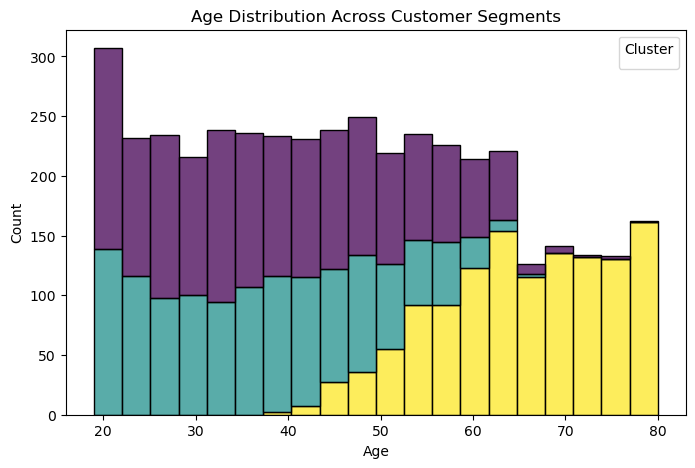

C:\Users\vatch\AppData\Local\Temp\ipykernel_27924\3911137408.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Cluster", y="monthly charge", estimator=np.mean, palette="coolwarm")


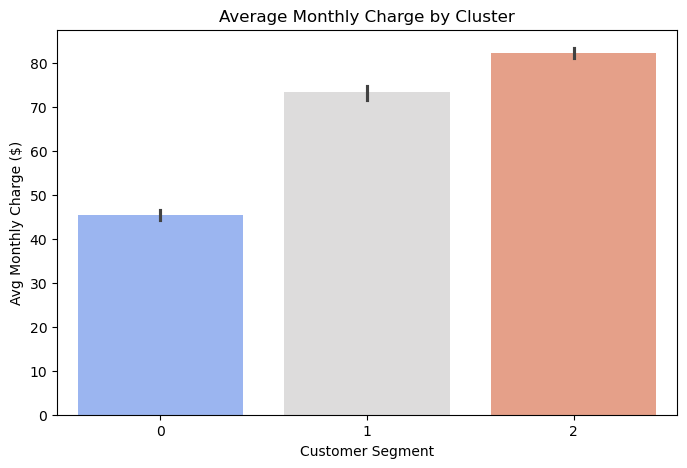

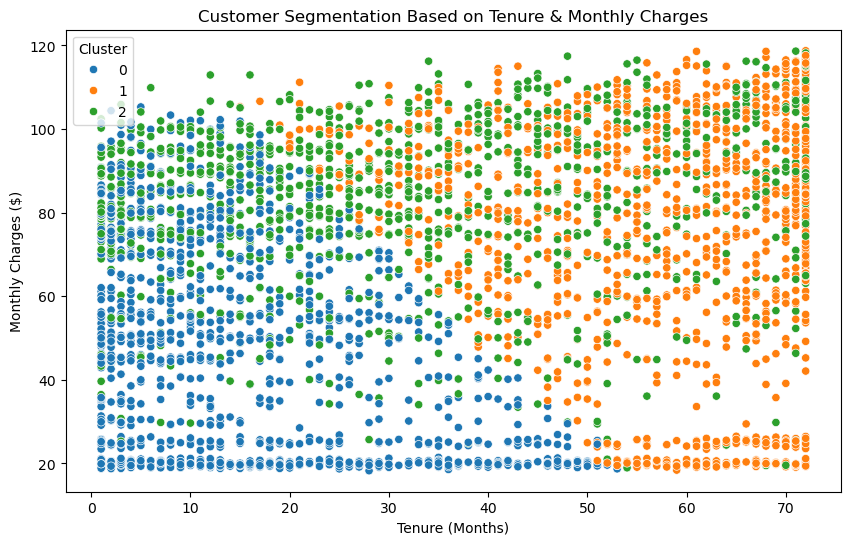

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"D:\atchaya\main.py\Telco-Customer-Churn.csv"  # Update the path

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: File not found. Check the file path and try again.")
    exit()

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Required columns for segmentation
columns_usage = ["tenure in months", "monthly charge", "age"]

# Check for missing columns
missing_columns = [col for col in columns_usage if col not in df.columns]
if missing_columns:
    print(f"❌ Error: Missing columns in dataset: {missing_columns}")
    exit()

# Select relevant columns
df_segment = df[columns_usage].copy()

# Handle missing values (fill with median)
df_segment.fillna(df_segment.median(), inplace=True)

# Normalize numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# Apply KMeans clustering (3 segments)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Print cluster sizes
print("\n📊 Customer Segmentation Results:")
print(df["Cluster"].value_counts())

# ------------------ VISUALIZATIONS ------------------

# 1️⃣ Histogram: Age distribution in Clusters
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="Cluster", multiple="stack", bins=20, palette="viridis")
plt.title("Age Distribution Across Customer Segments")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.show()

# 2️⃣ Bar Chart: Average Monthly Charge per Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Cluster", y="monthly charge", estimator=np.mean, palette="coolwarm")
plt.title("Average Monthly Charge by Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Avg Monthly Charge ($)")
plt.show()

# 3️⃣ Scatter Plot: Tenure vs Monthly Charge
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tenure in months", y="monthly charge", hue="Cluster", palette="tab10")
plt.title("Customer Segmentation Based on Tenure & Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/mnt/data/Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Standardize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Select relevant columns for segmentation
selected_columns = ["age", "monthly charge", "tenure in months"]
df_segment = df[selected_columns].dropna()

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_segment["Cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = df_segment["Cluster"]

# Set figure style
sns.set_style("whitegrid")

# Histogram: Age distribution in clusters
plt.figure(figsize=(8, 5))
sns.histplot(data=df_segment, x="age", hue="Cluster", bins=20, kde=True, palette="viridis")
plt.title("Age Distribution Across Clusters")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.show()

# Bar Chart: Average Monthly Charge per Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=df_segment, x="Cluster", y="monthly charge", palette="coolwarm", estimator=lambda x: x.mean())
plt.title("Average Monthly Charge per Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Average Monthly Charge ($)")
plt.show()

# Scatter Plot: Tenure vs. Monthly Charge
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_segment, x="tenure in months", y="monthly charge", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation: Tenure vs. Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Telco-Customer-Churn.csv'

C:\Users\vatch\AppData\Local\Temp\ipykernel_27924\1880701121.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x="gender", palette="coolwarm")


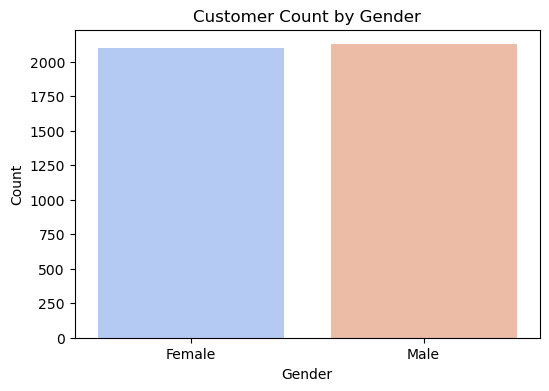

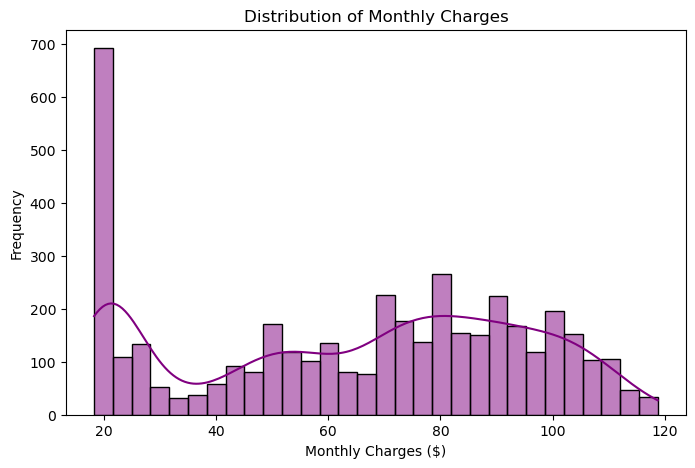

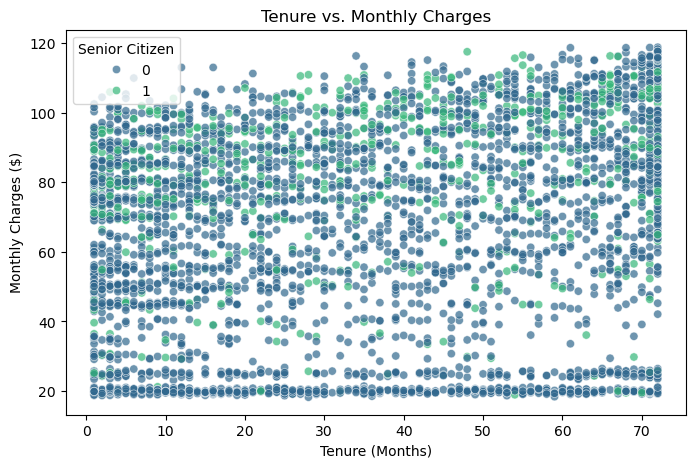

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D:/atchaya/main.py/Telco-Customer-Churn.csv"  # Using forward slashes
  # Update the path if needed
df = pd.read_csv(file_path)

# Standardize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Select relevant columns for segmentation
selected_columns = ["age", "gender", "state", "city", "monthly charge", "tenure in months", "senior citizen"]

# Check for missing columns
missing_cols = [col for col in selected_columns if col not in df.columns]
if missing_cols:
    print(f"❌ Missing columns in dataset: {missing_cols}")
    exit()

df_segment = df[selected_columns].copy()

# Handle missing values
df_segment.dropna(inplace=True)

### **Visualization 1: Bar Chart - Customer Count by Gender**
plt.figure(figsize=(6, 4))
sns.countplot(data=df_segment, x="gender", palette="coolwarm")
plt.title("Customer Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### **Visualization 2: Histogram - Distribution of Monthly Charges**
plt.figure(figsize=(8, 5))
sns.histplot(df_segment["monthly charge"], bins=30, kde=True, color="purple")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")
plt.show()

### **Visualization 3: Scatter Plot - Tenure vs. Monthly Charges**
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_segment, x="tenure in months", y="monthly charge", hue="senior citizen", palette="viridis", alpha=0.7)
plt.title("Tenure vs. Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Senior Citizen")
plt.show()
